In [1]:
import sys
import re
import numpy as np
import matplotlib.pyplot as plot
import scipy as scp
from scipy import optimize
from scipy import stats
plot.rcParams.update({'font.size': 20})
import pandas as pd
import statistics

In [51]:
VZ = (15*np.pi*(3.93/2)**2) #Volumen Zylinder
LZ = VZ/1000 #Liter zylinder

mes = [0]
E = []
t = []
c = 0


for m in mes:
    f = open("{0}ml.lab".format(m))
    t.append([])
    E.append([])


    for _ in range(23):
        f.readline()
    while True:
        s = f.readline()
        try:
            s_arr = re.split('\t',s)
            t[c].append(float(s_arr[1]))
            E[c].append(float(s_arr[2]))
        except:
            break
    c += 1
    
# Messwerte Bereinigen
Eco2 = []
tco2 = []
Eo2= []
to2 = []

medsco2 = []
medso2 = []

Iavg = []
I0avg = []

for e in E:
    minCut = 0
    maxCut = 0
    presMinCut = 0
    presMaxCut = 0
    
    
    #find minimum area for Co2 curve
    print(max(e))
    for i in range(2000,len(e)):
        if abs(min(e[2000:]) - e[i])<0.05:
            minCut = i
            break
    for i in range(minCut,len(e)):
        if abs(min(e[2000:]) - e[i])>0.05:
            maxCut = i
            break
    if maxCut == 0:
        maxCut = len(e)
    
    median = statistics.median(e[minCut:maxCut])
    medsco2.append(median)
    for i in range(minCut,maxCut):
        if abs(median-e[i])<0.025:
            presMinCut = i
            break
    for i in range(presMinCut+100,maxCut):
        if abs(median-e[i])>0.025:
            presMaxCut = i
            break
    if presMaxCut == 0:
        presMaxCut = maxCut
    
    
    s = 0
    for i in range(presMinCut,presMaxCut,1):
        s += e[i]
    s = s/(presMaxCut-presMinCut)
    #print(presMinCut,presMaxCut,s)
    
    Iavg.append(s)
    
    Eco2.append(e[presMinCut:presMaxCut])
    tco2.append(t[0][presMinCut:presMaxCut])
    
    
    
    #find maximum area for o2 curve
    for i in range(0,len(e)):
        if abs(max(e) - e[i])<0.05:
            minCut = i
            break
    for i in range(minCut,len(e)):
        if abs(max(e) - e[i])>0.05:
            maxCut = i
            break
    if maxCut == 0:
        maxCut = len(e)
    
    median = statistics.median(e[minCut:maxCut])
    medso2.append(median)
    for i in range(minCut,maxCut):
        if abs(median-e[i])<0.025:
            presMinCut = i
            break
    for i in range(presMinCut,maxCut):
        if abs(median-e[i])>0.025:
            presMaxCut = i
            break
    if presMaxCut == 0:
        presMaxCut = maxCut
        
    s = 0
    for i in range(presMinCut,presMaxCut,1):
        s += e[i]
    s = s/(presMaxCut-presMinCut)
    #print(presMinCut,presMaxCut,s)
    
    I0avg.append(s)
    
    Eo2.append(e[presMinCut:presMaxCut])
    to2.append(t[0][presMinCut:presMaxCut])


0.96492


In [52]:
medso2

[0.95982]

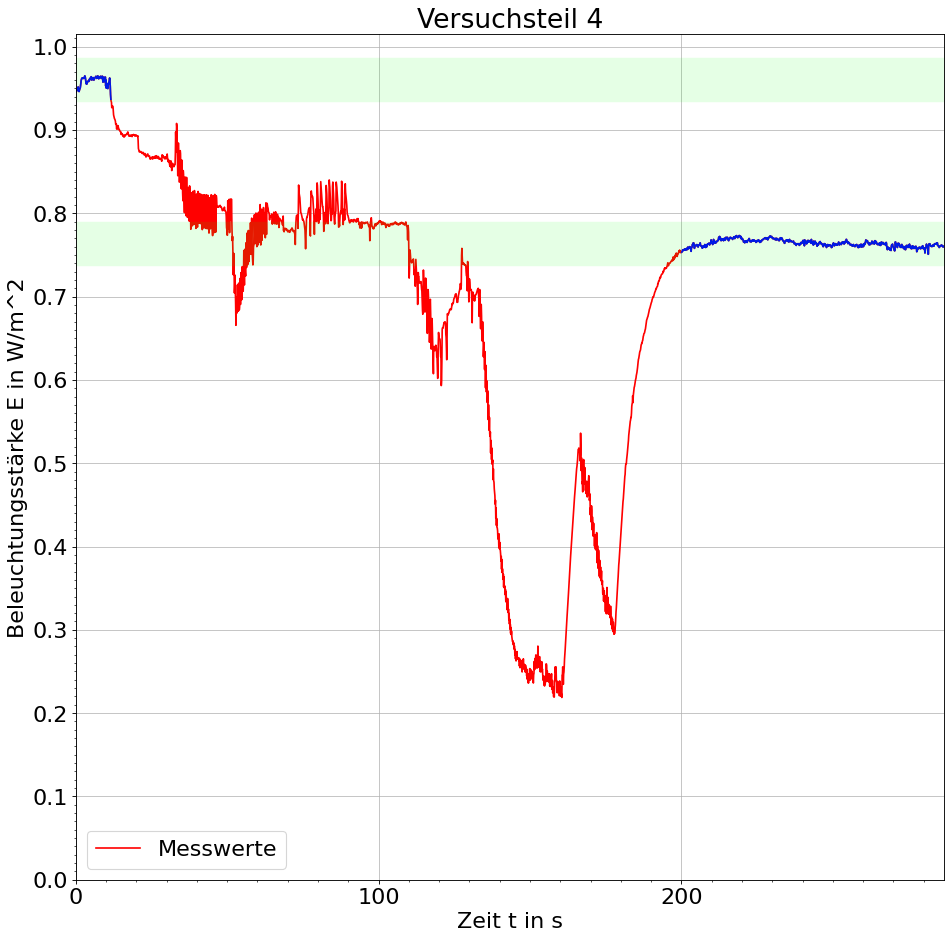

In [57]:
for i in range(len(E)):
    ind = i
    fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

    x_min = 0
    x_max = len(t[ind])/10
    y_min = 0
    y_max = max(E[ind])+0.05

    ax=axs
    #Settings
    ax.set_title('Versuchsteil 4'.format(mes[ind]))

    ax.plot(t[ind],E[ind], label="Messwerte", color="red")
    
    ax.plot(tco2[ind],Eco2[ind], color="blue")
    ax.plot([0,t[ind][-1]],[medsco2[ind],medsco2[ind]],linewidth=40, color="lime",alpha=0.1)
    
    ax.plot(to2[ind],Eo2[ind], color="blue")
    ax.plot([0,t[ind][-1]],[medso2[ind],medso2[ind]],linewidth=40, color="lime",alpha=0.1)
    
    #ax.plot([0,t[ind][-1]],[meds[ind]+0.025,meds[ind]+0.025], color="green", alpha=0.3)

    ax.set_xlabel("Zeit t in s")
    ax.set_ylabel("Beleuchtungsstärke E in W/m^2")

    #Grid Setting
    major_ticks = np.arange(x_min, x_max, 100)
    minor_ticks = np.arange(x_min, x_max, 10)
    major_ticks_y = np.arange(y_min, y_max, 0.1)
    minor_ticks_y = np.arange(y_min, y_max, 0.01)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)

    ax.grid(which='minor', alpha=0.55)
    ax.grid(which='major', alpha=0.8)

    ax.grid(which='both')
    plot.grid()
    plot.legend()
    plot.savefig("LuftPlot.png")

In [54]:
#Iavg[0] = I0avg[0]

relTrans = []
konz = []

for i in range(len(Iavg)):
    relTrans.append(Iavg[i]/I0avg[i])
    
    LZ = 15*np.pi*(3.93/2)**2/1000
    #LC = 2 #milliLiter co2
    konz.append(mes[i]/1000/LZ*100)
    

In [55]:
Iavg

[0.7637833025404188]

In [56]:
I0avg

[0.958355948275862]